In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from datetime import datetime as dt
from copy import deepcopy
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from attacks import fgsm, pgd
from utils import clean_acc, adv_acc, print_table
from trainer import Trainer, plot_history
from model import Small
from layers import *

1.7.0
True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = torch.seed()
print(f"seed: {seed}")
torch.manual_seed(seed)

cuda
seed: 3439627837794993977


In [4]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

batch_size = (100, 400)
train_dl = DataLoader(ds_train, batch_size=batch_size[0], shuffle=True)
test_dl = DataLoader(ds_test, batch_size=batch_size[1], shuffle=True)

iter_on_batch = len(train_dl)
print(f"iter_on_batch: {iter_on_batch}")

iter_on_batch: 600


## eps 0.005 co 30 epok
## kappa schodzi do 1/2 w 50 epok

In [5]:
from hyperparam_scheduler import LinearScheduler

kappa_scheduler = LinearScheduler(start=1, end=0.5)
kappa_scheduler.calc_coefficient(-0.5, 50, iter_on_batch)

eps_scheduler = LinearScheduler(start=0)
eps_scheduler.calc_coefficient(0.005, 30, iter_on_batch)

cuda
epoch start with: eps: 0.00000000, kappa: 1.00000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 1 Validation Loss: 0.1335 accuracy: 0.9595, robust err: 0.1250

epoch start with: eps: 0.00016667, kappa: 0.99000000
function: _train_test_epoch took: 0:01:24
function: _train_test_epoch took: 0:00:02
Epoch: 2 Validation Loss: 0.0963 accuracy: 0.9721, robust err: 0.1651

epoch start with: eps: 0.00033333, kappa: 0.98000000
function: _train_test_epoch took: 0:02:24
function: _train_test_epoch took: 0:00:04
Epoch: 3 Validation Loss: 0.0823 accuracy: 0.9769, robust err: 0.1624

epoch start with: eps: 0.00050000, kappa: 0.97000000
function: _train_test_epoch took: 0:01:19
function: _train_test_epoch took: 0:00:01
Epoch: 4 Validation Loss: 0.0738 accuracy: 0.9803, robust err: 0.1395

epoch start with: eps: 0.00066667, kappa: 0.96000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 5 Validation Loss: 

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 40 Validation Loss: 0.2025 accuracy: 0.9837, robust err: 0.1095

epoch start with: eps: 0.00666667, kappa: 0.60000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 41 Validation Loss: 0.2062 accuracy: 0.9838, robust err: 0.1087

epoch start with: eps: 0.00683333, kappa: 0.59000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 42 Validation Loss: 0.2133 accuracy: 0.9834, robust err: 0.1105

epoch start with: eps: 0.00700000, kappa: 0.58000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 43 Validation Loss: 0.2184 accuracy: 0.9834, robust err: 0.1113

epoch start with: eps: 0.00716667, kappa: 0.57000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 44 Validation Loss: 0.2224 accuracy: 0.9832, robust err: 0.1106

epoch st

function: _train_test_epoch took: 0:00:01
Epoch: 79 Validation Loss: 0.2959 accuracy: 0.9799, robust err: 0.1248

epoch start with: eps: 0.01316667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 80 Validation Loss: 0.2972 accuracy: 0.9800, robust err: 0.1256

epoch start with: eps: 0.01333333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 81 Validation Loss: 0.2985 accuracy: 0.9799, robust err: 0.1258

epoch start with: eps: 0.01350000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 82 Validation Loss: 0.2981 accuracy: 0.9800, robust err: 0.1257

epoch start with: eps: 0.01366667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 83 Validation Loss: 0.3004 accuracy: 0.9795, robust err: 0.1263

epoch start with: eps: 0.01383333, kappa: 0.500000

function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 119 Validation Loss: 0.3398 accuracy: 0.9791, robust err: 0.1348

epoch start with: eps: 0.01983333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 120 Validation Loss: 0.3398 accuracy: 0.9790, robust err: 0.1339

epoch start with: eps: 0.02000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 121 Validation Loss: 0.3420 accuracy: 0.9791, robust err: 0.1356

epoch start with: eps: 0.02016667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 122 Validation Loss: 0.3410 accuracy: 0.9793, robust err: 0.1343

epoch start with: eps: 0.02033333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 123 Validation Loss: 0.3434 accuracy: 0.9796, robust err: 0.1338

epo

function: _train_test_epoch took: 0:00:02
Epoch: 158 Validation Loss: 0.3853 accuracy: 0.9782, robust err: 0.1383

epoch start with: eps: 0.02633333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 159 Validation Loss: 0.3857 accuracy: 0.9778, robust err: 0.1393

epoch start with: eps: 0.02650000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 160 Validation Loss: 0.3871 accuracy: 0.9782, robust err: 0.1369

epoch start with: eps: 0.02666667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 161 Validation Loss: 0.3916 accuracy: 0.9777, robust err: 0.1379

epoch start with: eps: 0.02683333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 162 Validation Loss: 0.3892 accuracy: 0.9782, robust err: 0.1386

epoch start with: eps: 0.02700000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 198 Validation Loss: 0.4531 accuracy: 0.9759, robust err: 0.1453

epoch start with: eps: 0.03300000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 199 Validation Loss: 0.4545 accuracy: 0.9766, robust err: 0.1465

epoch start with: eps: 0.03316667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 200 Validation Loss: 0.4532 accuracy: 0.9758, robust err: 0.1427

epoch start with: eps: 0.03333333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 201 Validation Loss: 0.4569 accuracy: 0.9759, robust err: 0.1423

epoch start with: eps: 0.03350000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 202 Validation Loss: 0.4584 accuracy: 0.9766, robust err: 0.1428

epo

function: _train_test_epoch took: 0:00:01
Epoch: 239 Validation Loss: 0.5126 accuracy: 0.9754, robust err: 0.1442

epoch start with: eps: 0.03983333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 240 Validation Loss: 0.5246 accuracy: 0.9738, robust err: 0.1578

epoch start with: eps: 0.04000000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 241 Validation Loss: 0.5146 accuracy: 0.9749, robust err: 0.1477

epoch start with: eps: 0.04016667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 242 Validation Loss: 0.5207 accuracy: 0.9749, robust err: 0.1497

epoch start with: eps: 0.04033333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 243 Validation Loss: 0.5273 accuracy: 0.9757, robust err: 0.1569

epoch start with: eps: 0.04050000, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 279 Validation Loss: 0.5670 accuracy: 0.9739, robust err: 0.1507

epoch start with: eps: 0.04650000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 280 Validation Loss: 0.5743 accuracy: 0.9718, robust err: 0.1601

epoch start with: eps: 0.04666667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 281 Validation Loss: 0.5644 accuracy: 0.9745, robust err: 0.1480

epoch start with: eps: 0.04683333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 282 Validation Loss: 0.5755 accuracy: 0.9718, robust err: 0.1584

epoch start with: eps: 0.04700000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 283 Validation Loss: 0.5674 accuracy: 0.9744, robust err: 0.1520

epo

function: _train_test_epoch took: 0:00:02
Epoch: 318 Validation Loss: 0.5785 accuracy: 0.9714, robust err: 0.1568

epoch start with: eps: 0.05300000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 319 Validation Loss: 0.5912 accuracy: 0.9717, robust err: 0.1634

epoch start with: eps: 0.05316667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 320 Validation Loss: 0.5775 accuracy: 0.9728, robust err: 0.1534

epoch start with: eps: 0.05333333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 321 Validation Loss: 0.5752 accuracy: 0.9720, robust err: 0.1561

epoch start with: eps: 0.05350000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 322 Validation Loss: 0.5799 accuracy: 0.9710, robust err: 0.1584

epoch start with: eps: 0.05366667, kappa: 0.5

function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 358 Validation Loss: 0.5733 accuracy: 0.9717, robust err: 0.1577

epoch start with: eps: 0.05966667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 359 Validation Loss: 0.5689 accuracy: 0.9719, robust err: 0.1564

epoch start with: eps: 0.05983333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 360 Validation Loss: 0.5761 accuracy: 0.9713, robust err: 0.1621

epoch start with: eps: 0.06000000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 361 Validation Loss: 0.5749 accuracy: 0.9701, robust err: 0.1636

epoch start with: eps: 0.06016667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 362 Validation Loss: 0.5749 accuracy: 0.9732, robust err: 0.1581

epo

function: _train_test_epoch took: 0:00:02
Epoch: 397 Validation Loss: 0.5618 accuracy: 0.9686, robust err: 0.1712

epoch start with: eps: 0.06616667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 398 Validation Loss: 0.5599 accuracy: 0.9705, robust err: 0.1638

epoch start with: eps: 0.06633333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 399 Validation Loss: 0.5584 accuracy: 0.9695, robust err: 0.1697

epoch start with: eps: 0.06650000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 400 Validation Loss: 0.5614 accuracy: 0.9696, robust err: 0.1650

epoch start with: eps: 0.06666667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:02
Epoch: 401 Validation Loss: 0.5539 accuracy: 0.9712, robust err: 0.1620

epoch start with: eps: 0.06683333, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 437 Validation Loss: 0.5296 accuracy: 0.9704, robust err: 0.1655

epoch start with: eps: 0.07283333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:57
function: _train_test_epoch took: 0:00:01
Epoch: 438 Validation Loss: 0.5355 accuracy: 0.9676, robust err: 0.1736

epoch start with: eps: 0.07300000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 439 Validation Loss: 0.5310 accuracy: 0.9681, robust err: 0.1734

epoch start with: eps: 0.07316667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 440 Validation Loss: 0.5313 accuracy: 0.9701, robust err: 0.1708

epoch start with: eps: 0.07333333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 441 Validation Loss: 0.5257 accuracy: 0.9693, robust err: 0.1648

epo

function: _train_test_epoch took: 0:00:01
Epoch: 476 Validation Loss: 0.5024 accuracy: 0.9704, robust err: 0.1633

epoch start with: eps: 0.07933333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 477 Validation Loss: 0.5240 accuracy: 0.9680, robust err: 0.1763

epoch start with: eps: 0.07950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 478 Validation Loss: 0.5335 accuracy: 0.9672, robust err: 0.1804

epoch start with: eps: 0.07966667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:46
function: _train_test_epoch took: 0:00:02
Epoch: 479 Validation Loss: 0.5093 accuracy: 0.9682, robust err: 0.1703

epoch start with: eps: 0.07983333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 480 Validation Loss: 0.5133 accuracy: 0.9661, robust err: 0.1754

epoch start with: eps: 0.08000000, kappa: 0.5

function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:01
Epoch: 516 Validation Loss: 0.4991 accuracy: 0.9689, robust err: 0.1683

epoch start with: eps: 0.08600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 517 Validation Loss: 0.4965 accuracy: 0.9664, robust err: 0.1711

epoch start with: eps: 0.08616667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 518 Validation Loss: 0.5054 accuracy: 0.9695, robust err: 0.1700

epoch start with: eps: 0.08633333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 519 Validation Loss: 0.4994 accuracy: 0.9677, robust err: 0.1763

epoch start with: eps: 0.08650000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 520 Validation Loss: 0.4966 accuracy: 0.9674, robust err: 0.1729

epo

function: _train_test_epoch took: 0:00:01
Epoch: 555 Validation Loss: 0.5068 accuracy: 0.9688, robust err: 0.1717

epoch start with: eps: 0.09250000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 556 Validation Loss: 0.5147 accuracy: 0.9654, robust err: 0.1792

epoch start with: eps: 0.09266667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 557 Validation Loss: 0.5154 accuracy: 0.9668, robust err: 0.1765

epoch start with: eps: 0.09283333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 558 Validation Loss: 0.5169 accuracy: 0.9683, robust err: 0.1759

epoch start with: eps: 0.09300000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 559 Validation Loss: 0.5121 accuracy: 0.9683, robust err: 0.1762

epoch start with: eps: 0.09316667, kappa: 0.5

function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 595 Validation Loss: 0.5328 accuracy: 0.9664, robust err: 0.1800

epoch start with: eps: 0.09916667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 596 Validation Loss: 0.5306 accuracy: 0.9674, robust err: 0.1775

epoch start with: eps: 0.09933333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 597 Validation Loss: 0.5301 accuracy: 0.9670, robust err: 0.1711

epoch start with: eps: 0.09950000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:46
function: _train_test_epoch took: 0:00:02
Epoch: 598 Validation Loss: 0.5238 accuracy: 0.9658, robust err: 0.1782

epoch start with: eps: 0.09966667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 599 Validation Loss: 0.5276 accuracy: 0.9681, robust err: 0.1764

epo

function: _train_test_epoch took: 0:00:01
Epoch: 634 Validation Loss: 0.5332 accuracy: 0.9655, robust err: 0.1798

epoch start with: eps: 0.10566667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 635 Validation Loss: 0.5338 accuracy: 0.9661, robust err: 0.1746

epoch start with: eps: 0.10583333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:46
function: _train_test_epoch took: 0:00:02
Epoch: 636 Validation Loss: 0.5355 accuracy: 0.9658, robust err: 0.1821

epoch start with: eps: 0.10600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:46
function: _train_test_epoch took: 0:00:02
Epoch: 637 Validation Loss: 0.5322 accuracy: 0.9680, robust err: 0.1767

epoch start with: eps: 0.10616667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 638 Validation Loss: 0.5460 accuracy: 0.9603, robust err: 0.1931

epoch start with: eps: 0.10633333, kappa: 0.5

function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 674 Validation Loss: 0.5329 accuracy: 0.9643, robust err: 0.1821

epoch start with: eps: 0.11233333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 675 Validation Loss: 0.5514 accuracy: 0.9605, robust err: 0.1930

epoch start with: eps: 0.11250000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 676 Validation Loss: 0.5247 accuracy: 0.9650, robust err: 0.1809

epoch start with: eps: 0.11266667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:01
Epoch: 677 Validation Loss: 0.5596 accuracy: 0.9640, robust err: 0.1988

epoch start with: eps: 0.11283333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 678 Validation Loss: 0.5332 accuracy: 0.9666, robust err: 0.1773

epo

function: _train_test_epoch took: 0:00:01
Epoch: 713 Validation Loss: 0.5376 accuracy: 0.9650, robust err: 0.1845

epoch start with: eps: 0.11883333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:02
Epoch: 714 Validation Loss: 0.5462 accuracy: 0.9650, robust err: 0.1930

epoch start with: eps: 0.11900000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:47
function: _train_test_epoch took: 0:00:01
Epoch: 715 Validation Loss: 0.5340 accuracy: 0.9654, robust err: 0.1813

epoch start with: eps: 0.11916667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 716 Validation Loss: 0.5439 accuracy: 0.9631, robust err: 0.1949

epoch start with: eps: 0.11933333, kappa: 0.50000000
function: _train_test_epoch took: 0:00:46
function: _train_test_epoch took: 0:00:02
Epoch: 717 Validation Loss: 0.5350 accuracy: 0.9660, robust err: 0.1846

epoch start with: eps: 0.11950000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 753 Validation Loss: 0.5536 accuracy: 0.9609, robust err: 0.1965

epoch start with: eps: 0.12550000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:02
Epoch: 754 Validation Loss: 0.5494 accuracy: 0.9639, robust err: 0.1892

epoch start with: eps: 0.12566667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 755 Validation Loss: 0.5375 accuracy: 0.9638, robust err: 0.1842

epoch start with: eps: 0.12583333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 756 Validation Loss: 0.5470 accuracy: 0.9637, robust err: 0.1885

epoch start with: eps: 0.12600000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 757 Validation Loss: 0.5302 accuracy: 0.9613, robust err: 0.1884

epo

function: _train_test_epoch took: 0:00:01
Epoch: 792 Validation Loss: 0.5580 accuracy: 0.9640, robust err: 0.1841

epoch start with: eps: 0.13200000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 793 Validation Loss: 0.5633 accuracy: 0.9604, robust err: 0.1971

epoch start with: eps: 0.13216667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 794 Validation Loss: 0.5509 accuracy: 0.9649, robust err: 0.1840

epoch start with: eps: 0.13233333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 795 Validation Loss: 0.5633 accuracy: 0.9626, robust err: 0.1894

epoch start with: eps: 0.13250000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 796 Validation Loss: 0.5786 accuracy: 0.9596, robust err: 0.1954

epoch start with: eps: 0.13266667, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 832 Validation Loss: 0.6063 accuracy: 0.9546, robust err: 0.2133

epoch start with: eps: 0.13866667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 833 Validation Loss: 0.5779 accuracy: 0.9602, robust err: 0.1948

epoch start with: eps: 0.13883333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 834 Validation Loss: 0.5891 accuracy: 0.9606, robust err: 0.1903

epoch start with: eps: 0.13900000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 835 Validation Loss: 0.5797 accuracy: 0.9629, robust err: 0.1915

epoch start with: eps: 0.13916667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 836 Validation Loss: 0.5791 accuracy: 0.9599, robust err: 0.1967

epo

function: _train_test_epoch took: 0:00:02
Epoch: 871 Validation Loss: 0.6231 accuracy: 0.9623, robust err: 0.1991

epoch start with: eps: 0.14516667, kappa: 0.50000000
function: _train_test_epoch took: 0:00:58
function: _train_test_epoch took: 0:00:01
Epoch: 872 Validation Loss: 0.6018 accuracy: 0.9612, robust err: 0.1957

epoch start with: eps: 0.14533333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 873 Validation Loss: 0.5951 accuracy: 0.9606, robust err: 0.1939

epoch start with: eps: 0.14550000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 874 Validation Loss: 0.6094 accuracy: 0.9621, robust err: 0.1956

epoch start with: eps: 0.14566667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 875 Validation Loss: 0.6011 accuracy: 0.9595, robust err: 0.1970

epoch start with: eps: 0.14583333, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:01
Epoch: 911 Validation Loss: 0.6416 accuracy: 0.9584, robust err: 0.2065

epoch start with: eps: 0.15183333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 912 Validation Loss: 0.6462 accuracy: 0.9627, robust err: 0.2089

epoch start with: eps: 0.15200000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 913 Validation Loss: 0.6330 accuracy: 0.9584, robust err: 0.2059

epoch start with: eps: 0.15216667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 914 Validation Loss: 0.6595 accuracy: 0.9612, robust err: 0.2038

epoch start with: eps: 0.15233333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 915 Validation Loss: 0.6399 accuracy: 0.9610, robust err: 0.2019

epo

function: _train_test_epoch took: 0:00:01
Epoch: 950 Validation Loss: 0.6900 accuracy: 0.9570, robust err: 0.2177

epoch start with: eps: 0.15833333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 951 Validation Loss: 0.6702 accuracy: 0.9577, robust err: 0.2083

epoch start with: eps: 0.15850000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 952 Validation Loss: 0.6980 accuracy: 0.9548, robust err: 0.2204

epoch start with: eps: 0.15866667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 953 Validation Loss: 0.6665 accuracy: 0.9597, robust err: 0.1913

epoch start with: eps: 0.15883333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 954 Validation Loss: 0.6835 accuracy: 0.9565, robust err: 0.2062

epoch start with: eps: 0.15900000, kappa: 0.5

function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 990 Validation Loss: 0.7207 accuracy: 0.9566, robust err: 0.2144

epoch start with: eps: 0.16500000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 991 Validation Loss: 0.7118 accuracy: 0.9565, robust err: 0.2074

epoch start with: eps: 0.16516667, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:01
Epoch: 992 Validation Loss: 0.7106 accuracy: 0.9568, robust err: 0.2081

epoch start with: eps: 0.16533333, kappa: 0.50000000
function: _train_test_epoch took: 0:01:00
function: _train_test_epoch took: 0:00:02
Epoch: 993 Validation Loss: 0.7135 accuracy: 0.9559, robust err: 0.2131

epoch start with: eps: 0.16550000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:59
function: _train_test_epoch took: 0:00:02
Epoch: 994 Validation Loss: 0.7157 accuracy: 0.9609, robust err: 0.2008

epo

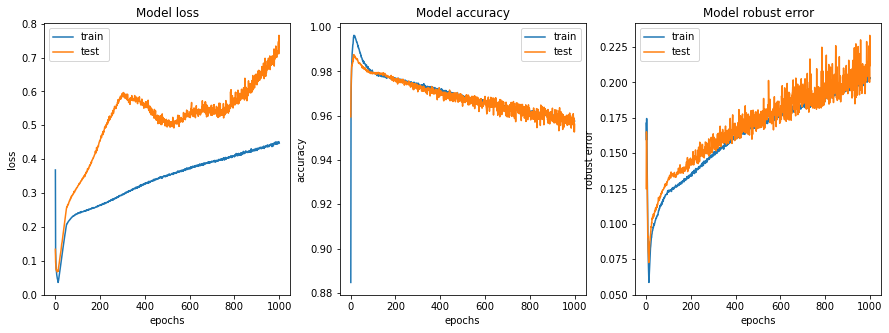

In [6]:
model_name = "mnist_small_0_005_exp2"


trainer = Trainer(model_name, train_dl, test_dl, eps_scheduler, kappa_scheduler, checkpoint=10)
model = Small()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-4,
                                                 patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=1000)
plot_history(model_name, history)

In [7]:
print(f"max eps: {eps_scheduler.current}")

max eps: 0.16666666666746544


In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = MNIST('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 400, shuffle=True)


def create_attack(eps, alpha, num_iter):
    d = {
        "epsilon": eps,
        "alpha": alpha,
        "num_iter": num_iter
    }
    return f"e={eps:.1f},a={alpha:.1f},i={num_iter}", d
    

attack1 = create_attack(eps=0.1, alpha=0.1, num_iter=30)
attack2 = create_attack(eps=0.2, alpha=0.1, num_iter=30)
attack3 = create_attack(eps=0.3, alpha=0.1, num_iter=30)
attack4 = create_attack(eps=0.4, alpha=0.1, num_iter=30)

params = [attack1, attack2, attack3, attack4]

In [9]:
model_name = "mnist_small_0_005_exp2"

In [10]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_10.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9851                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6953           
name: e=0.2,a=0.1,i=30 accuracy: 0.0126           
name: e=0.3,a=0.1,i=30 accuracy: 0.0000           
name: e=0.4,a=0.1,i=30 accuracy: 0.0000           


In [11]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_100.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.979                             
name: e=0.1,a=0.1,i=30 accuracy: 0.7661           
name: e=0.2,a=0.1,i=30 accuracy: 0.0396           
name: e=0.3,a=0.1,i=30 accuracy: 0.0195           
name: e=0.4,a=0.1,i=30 accuracy: 0.0197           


In [12]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_200.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9758                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7470           
name: e=0.2,a=0.1,i=30 accuracy: 0.0507           
name: e=0.3,a=0.1,i=30 accuracy: 0.0147           
name: e=0.4,a=0.1,i=30 accuracy: 0.0149           


In [13]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_300.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9708                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7229           
name: e=0.2,a=0.1,i=30 accuracy: 0.0593           
name: e=0.3,a=0.1,i=30 accuracy: 0.0211           
name: e=0.4,a=0.1,i=30 accuracy: 0.0197           


In [14]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_400.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9696                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7167           
name: e=0.2,a=0.1,i=30 accuracy: 0.0711           
name: e=0.3,a=0.1,i=30 accuracy: 0.0298           
name: e=0.4,a=0.1,i=30 accuracy: 0.0283           


In [15]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_500.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9643                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6866           
name: e=0.2,a=0.1,i=30 accuracy: 0.0700           
name: e=0.3,a=0.1,i=30 accuracy: 0.0243           
name: e=0.4,a=0.1,i=30 accuracy: 0.0237           


In [16]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_600.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9687                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7014           
name: e=0.2,a=0.1,i=30 accuracy: 0.0914           
name: e=0.3,a=0.1,i=30 accuracy: 0.0360           
name: e=0.4,a=0.1,i=30 accuracy: 0.0347           


In [17]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_700.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9643                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6611           
name: e=0.2,a=0.1,i=30 accuracy: 0.0889           
name: e=0.3,a=0.1,i=30 accuracy: 0.0455           
name: e=0.4,a=0.1,i=30 accuracy: 0.0451           


In [18]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_800.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9615                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6504           
name: e=0.2,a=0.1,i=30 accuracy: 0.1162           
name: e=0.3,a=0.1,i=30 accuracy: 0.0848           
name: e=0.4,a=0.1,i=30 accuracy: 0.0861           


In [19]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_900.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9602                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6484           
name: e=0.2,a=0.1,i=30 accuracy: 0.1163           
name: e=0.3,a=0.1,i=30 accuracy: 0.0898           
name: e=0.4,a=0.1,i=30 accuracy: 0.0907           


In [20]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_1000.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9561                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6012           
name: e=0.2,a=0.1,i=30 accuracy: 0.1202           
name: e=0.3,a=0.1,i=30 accuracy: 0.0960           
name: e=0.4,a=0.1,i=30 accuracy: 0.0968           
